In [2]:
from graph_based_sampling import *
import time

graphs = [load_graph_env(i) for i in range(1, 5)]

In [3]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from evaluation_based_sampling import *

%matplotlib inline

def plot_hist(vals, weights, figsize=(10, 5)):
    plt.figure(figsize=figsize)
    plt.hist(vals, bins=50, weights=weights)
    plt.show()
    
def plot_2_hists(vals, weights):
    plt.subplot(1, 2, 1)
    plt.hist(vals[:, 0], bins=50, weights=weights)
    plt.subplot(1, 2, 2)
    plt.hist(vals[:, 1], bins=50, weights=weights)
    plt.tight_layout()
    plt.show()


In [7]:
n_samples = int(1e4)
start_time = time.time()
samples = torch.stack(mh_gibbs_sampling(graphs[0], steps=n_samples))
print("--- %s seconds ---" % (time.time() - start_time))
mean = samples.mean()
var = samples.std()
print('Number of samples:', n_samples)
print('Mean:', mean)
print('Var:', var)

--- 4.462717056274414 seconds ---
Number of samples: 10000
Mean: tensor(8.2664)
Var: tensor(0.8000)


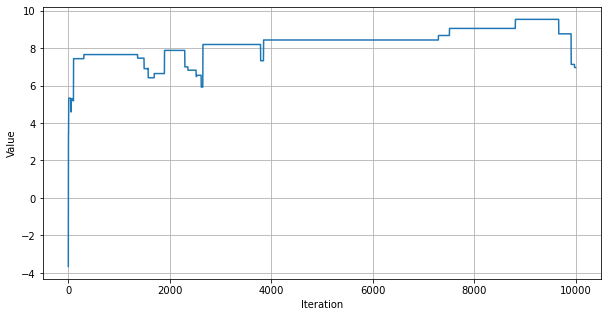

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(samples)), samples.numpy())
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.grid()

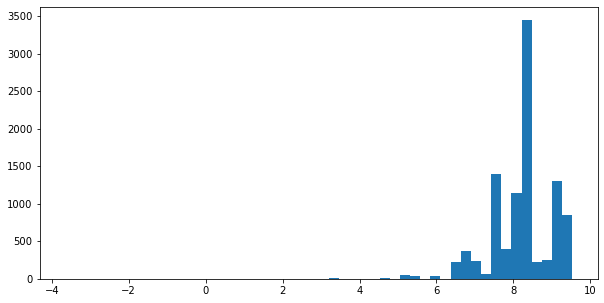

In [9]:
plot_hist(samples.numpy(), None)

In [1]:
n_samples = int(1e4)
start_time = time.time()
samples = torch.stack(mh_gibbs_sampling(graphs[1], steps=n_samples))
print("--- %s seconds ---" % (time.time() - start_time))
mean = samples.mean(dim=0)
cov = np.cov(samples.numpy(), rowvar=False)
print('Number of samples:', n_samples)
print('Mean:', mean)
print('Cov:', cov)

NameError: name 'time' is not defined

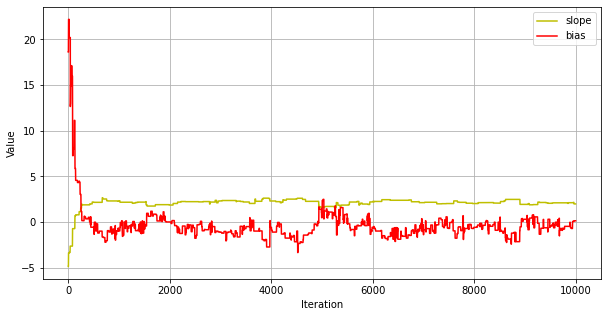

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(samples)), samples.numpy()[:, 0], color='y', label='slope')
plt.plot(range(len(samples)), samples.numpy()[:, 1], color='r', label='bias')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid()

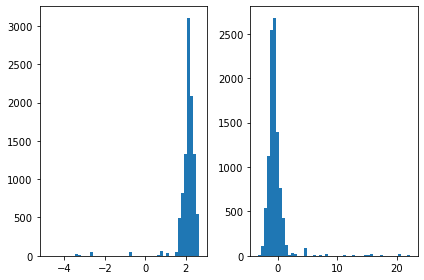

In [13]:
plot_2_hists(samples.numpy(), None)

In [4]:
n_samples = int(1e5)
start_time = time.time()
samples = torch.stack(mh_gibbs_sampling(graphs[2], steps=n_samples))
print("--- %s seconds ---" % (time.time() - start_time))
mean = samples.numpy().astype('int').mean()
var = samples.numpy().astype('int').std()
print('Number of samples:', n_samples)
print('Mean:', mean)
print('Var:', var)

/Users/amin/Projects/Masters/Winter2021/CPSC-532W/HW2/graph_based_sampling.py:128: RuntimeWarning: overflow encountered in exp
  return np.exp(logA)


--- 1527.1947367191315 seconds ---
Number of samples: 100000
Mean: 0.6376736232637673
Var: 0.4806724180327245


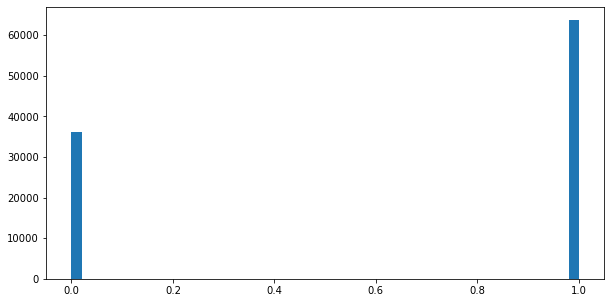

In [5]:
plot_hist(samples.numpy().astype(int), None)

In [6]:
n_samples = int(1e5)
start_time = time.time()
samples = torch.stack(mh_gibbs_sampling(graphs[3], steps=n_samples))
print("--- %s seconds ---" % (time.time() - start_time))
mean = samples.mean(dim=0)
var = samples.std()
print('Number of samples:', n_samples)
print('Mean:', mean)
print('Var:', var)

--- 147.2172291278839 seconds ---
Number of samples: 100000
Mean: tensor(0.5240)
Var: tensor(0.4994)


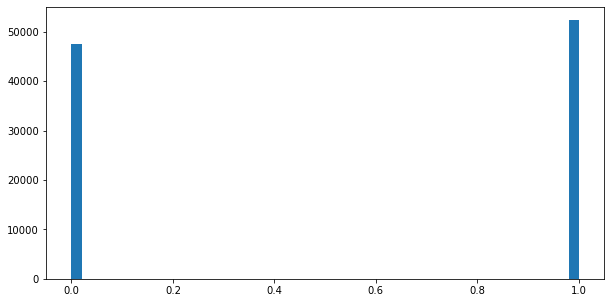

In [7]:
plot_hist(samples.numpy(), None)